## Simple Linear Regression 

1) Delivery_time -> Predict delivery time using sorting time

## 1. import Libes

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

## 2. Import DataSet

In [ ]:
from google.colab import files
upload = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
data = pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 3. Data Visulization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


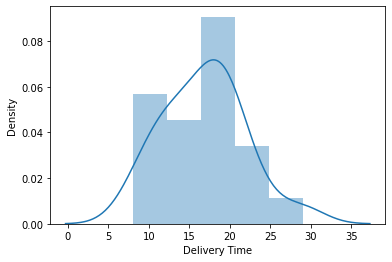

In [ ]:
sns.distplot(data['Delivery Time'])


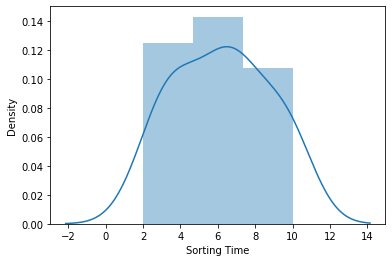

In [ ]:
sns.distplot(data['Sorting Time'])


## Scatter Plot

In [115]:
Delivery_Time = data['Delivery Time']
Sorting_Time = data['Sorting Time']

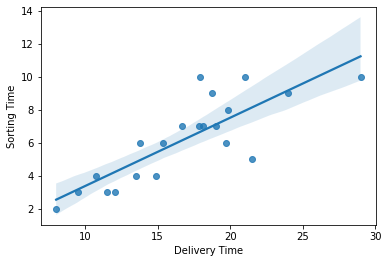

In [116]:
sns.regplot(x='Delivery Time',y='Sorting Time', data=data);

## 4. Correlation Analysis

In [117]:
data.corr()


,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


The Correllation Between delivery time and sorting time is high

## 5. Model Building

## 0. No Transformation

In [118]:
x = data['Delivery Time']
y = data['Sorting Time']

In [121]:
model = sm.OLS(y, x).fit()
prediction = model.predict(x)

In [122]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Sorting Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                    6.12e-15
Time:                        11:53:34   Log-Likelihood:                         -37.082
No. Observations:                  21   AIC:                                      76.16
Df Residuals:                      20   BIC:                                      77.21
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Delivery Time     0.3723      0.018     20.603      0.000       0.335       0.410
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.597
Skew:                           0.399   Prob(JB):                        0.742
Kurtosis:                       3.217   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1. Log Transforamtion of x

In [123]:
x_log = np.log(data['Sorting Time'])

In [124]:
model1 = sm.OLS(y, x_log).fit()
prediction1 = model1.predict(x_log)

In [125]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Sorting Time   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              1018.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                    1.25e-18
Time:                        11:54:18   Log-Likelihood:                         -28.172
No. Observations:                  21   AIC:                                      58.34
Df Residuals:                      20   BIC:                                      59.39
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     3.6942      0.116     31.913      0.000       3.453       3.936
==============================================================================
Omnibus:                        3.197   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.616
Skew:                           0.776   Prob(JB):                        0.270
Kurtosis:                       2.236   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Log Transformation of Y

In [126]:
y_log = np.log(data['Delivery Time'])

In [127]:
model2 = sm.OLS(y_log, x).fit()
prediction2 = model2.predict(x)

In [128]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              613.2
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                    1.77e-16
Time:                        11:54:47   Log-Likelihood:                         -15.083
No. Observations:                  21   AIC:                                      32.17
Df Residuals:                      20   BIC:                                      33.21
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Delivery Time     0.1570      0.006     24.763      0.000       0.144       0.170
==============================================================================
Omnibus:                        4.866   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                2.811
Skew:                          -0.821   Prob(JB):                        0.245
Kurtosis:                       3.720   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. Log Transformation of X & Y

In [129]:
model3 = sm.OLS(y_log, x_log).fit()
prediction3 = model3.predict(x_log)

In [130]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                    5.72e-17
Time:                        11:55:18   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Square Root Transformation of X & Y

In [131]:
x_sqrt = np.sqrt(data['Delivery Time'])

In [132]:
model4 = sm.OLS(y, x_sqrt).fit()
prediction4 = model4.predict(x_sqrt)

In [133]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Sorting Time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                    5.09e-13
Time:                        11:56:48   Log-Likelihood:                         -41.713
No. Observations:                  21   AIC:                                      85.43
Df Residuals:                      20   BIC:                                      86.47
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Delivery Time     1.5696      0.096     16.309      0.000       1.369       1.770
==============================================================================
Omnibus:                        1.693   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.157
Skew:                           0.305   Prob(JB):                        0.561
Kurtosis:                       2.026   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. Square Root Transformation of Y

In [134]:
y_sqrt = np.sqrt(data['Sorting Time'])

In [135]:
model5 = sm.OLS(y_sqrt, x).fit()
prediction5 = model5.predict(x)

In [136]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Sorting Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                    1.88e-17
Time:                        11:59:15   Log-Likelihood:                         -10.312
No. Observations:                  21   AIC:                                      22.62
Df Residuals:                      20   BIC:                                      23.67
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Delivery Time     0.1403      0.005     27.785      0.000       0.130       0.151
==============================================================================
Omnibus:                        6.513   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                4.336
Skew:                          -1.061   Prob(JB):                        0.114
Kurtosis:                       3.674   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Square Root Transformation of X & Y

In [137]:
model6 = sm.OLS(y_sqrt, x_sqrt).fit()
prediction6 = model6.predict(x_sqrt)

In [138]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Sorting Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                    2.10e-20
Time:                        11:59:46   Log-Likelihood:                         -3.1813
No. Observations:                  21   AIC:                                      8.363
Df Residuals:                      20   BIC:                                      9.407
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Delivery Time     0.6033      0.015     39.267      0.000       0.571       0.635
==============================================================================
Omnibus:                        0.178   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.257
Skew:                           0.184   Prob(JB):                        0.880
Kurtosis:                       2.602   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## END 

## We will use model 6 it has the best R square value = 0.987

p-value = 0.01
coefficeint = 0.6033
adj.R-square = 0.987 i.e. 98.7%